Pymaceuticals - Observations:

1) Results show a strong positive correlation between the size of each mouse and their average tumor size, while on the Capomulin treatment.

2) Both of the drugs Capomulin and Ramicane had lower average tumor volumes associated with them, when compared to Infubinol and Ceftamin.

3) The data for Capomulin, Ramicane, Infubinol and Ceftamin, only had one outlier, implying a fairly robust data set.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
# Display the data table for preview
# Merging both dfs
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice at start
mice_start = combined_data["Mouse ID"].nunique()
mice_start

249

In [5]:
# Locating mice that have unqiue IDs by ID and Timepoint
duplicate_search = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_search

array(['g989'], dtype=object)

In [6]:
# Returning full rows for all instances of the duplicate ID
dup_data = combined_data.loc[combined_data["Mouse ID"] == "g989"]
dup_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Cleaned data is made up of those rows whose IDs were not flagged in the duplicate search
cleaned_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_search)]
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Counting the remaining mice
mice_left = cleaned_data["Mouse ID"].nunique()
mice_left

248

In [9]:
# Generating a summary statistics table of the tumor volume for each regimen

drug_group = cleaned_data.groupby("Drug Regimen")
mean = drug_group["Tumor Volume (mm3)"].mean()
median = drug_group["Tumor Volume (mm3)"].median()
variance = drug_group["Tumor Volume (mm3)"].var()
std_dev = drug_group["Tumor Volume (mm3)"].std()
std_err_mean = drug_group["Tumor Volume (mm3)"].sem()

drug_regimen_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": std_dev, "SEM": std_err_mean})
drug_regimen_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'No. of mice tested')

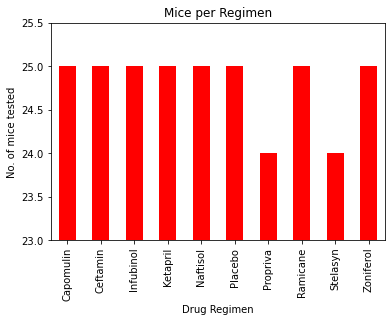

In [10]:
# Pandas Bar Chart showing the total number of mice for each treatment throughout the course of the study

# Grouping all unique Mouse IDs by drug - will be used for both bar graphs
mice_by_drug = cleaned_data.groupby("Drug Regimen")["Mouse ID"].nunique()
ax = mice_by_drug.plot(kind="bar", title ="Mice per Regimen", facecolor="red")
plt.ylim(23, max(mice_by_drug) + .5)
ax.set_ylabel("No. of mice tested")

Text(0, 0.5, 'No. of mice tested')

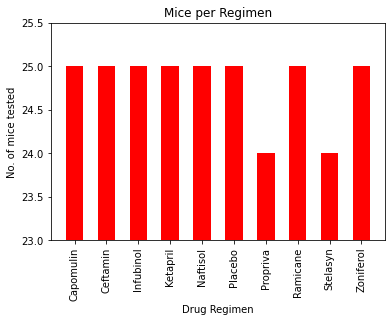

In [11]:
# Pyplot Bar Chart showing the total number of mice for each treatment throughout the course of the study

# Creating the x-axis
x_axis = np.arange(0, len(mice_by_drug))

# Setting up tick locations then plotting graph
ticks = []
[ticks.append(value) for value in x_axis]
plt.bar(mice_by_drug.index, mice_by_drug, color='red', align="center", width=0.55)

# Formatting
plt.xticks(ticks, mice_by_drug.index,rotation="vertical")
plt.ylim(23, max(mice_by_drug) + .5)
plt.title("Mice per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("No. of mice tested")

<AxesSubplot:title={'center':'Number of Males vs Females'}, ylabel='Sex'>

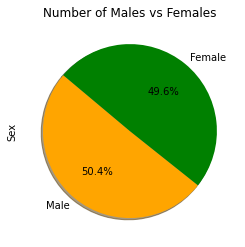

In [12]:
# Pandas Pie Chart showing the distribution of female versus male mice using pandas

# Dropping the duplicates by Mouse ID then counting by sex - used for both pie charts
unique_mice_sex = cleaned_data[["Sex", "Mouse ID"]].drop_duplicates()
no_by_sex = unique_mice_sex["Sex"].value_counts()

# Formatting and plotting
no_by_sex.plot.pie(y='no_by_sex', title = "Number of Males vs Females", figsize=(4, 4), colors=["orange","green"], 
                   autopct="%1.1f%%", startangle=140, shadow=True)


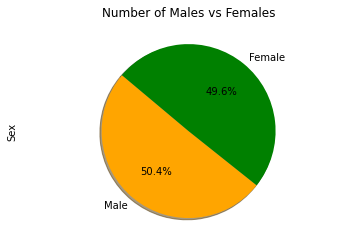

In [13]:
# Pyplot Pie Chart showing the distribution of female versus male mice using pandas

# Formatting
labels = no_by_sex.index
colors = ["orange","green"]
plt.axis("equal")
plt.title("Number of Males vs Females")
plt.ylabel("Sex")

# Plotting
plt.pie(no_by_sex, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
end_times = cleaned_data.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_final_size = pd.merge(cleaned_data, end_times, how="inner", on=["Mouse ID", "Timepoint"])
tumor_final_size

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


The outliers are: [Series([], Name: Tumor Volume (mm3), dtype: float64), Series([], Name: Tumor Volume (mm3), dtype: float64), 74    36.321346
Name: Tumor Volume (mm3), dtype: float64, Series([], Name: Tumor Volume (mm3), dtype: float64)]


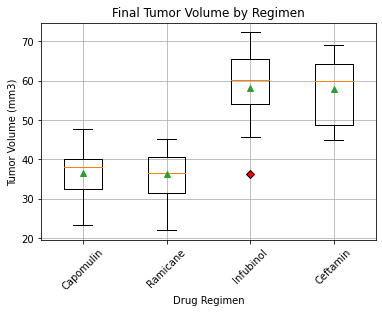

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Treatment regimens
four_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol_list = []
outliers_list = []
for x in four_treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = tumor_final_size.loc[tumor_final_size["Drug Regimen"] == x]["Tumor Volume (mm3)"]
    # Add subset 
    tumor_vol_list.append(tumor_vol)
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25,0.5,0.75])
    upper_q = quartiles[0.75]
    lower_q = quartiles[0.25]
    iqr = upper_q - lower_q
    upper_bound = upper_q + (1.5 * iqr)
    lower_bound = lower_q - (1.5 * iqr)
    # If a value is calculated to be an outlier it is appended into the outliers_list
    outliers = tumor_vol[(tumor_vol > upper_bound) | (tumor_vol < lower_bound)]
    outliers_list.append(outliers)
print(f"The outliers are: {outliers_list}")

# Create box plot and format
fig2, ax2 = plt.subplots()
ax2.set_title('Final Tumor Volume by Regimen')
ax2.set_xlabel("Drug Regimen")
ax2.set_ylabel("Tumor Volume (mm3)")
red_diamond = dict(markerfacecolor='r', marker='D')
ax2.boxplot(tumor_vol_list, flierprops=red_diamond, showmeans=True)
ax2.set_xticklabels(labels=four_treatments, rotation=45, fontsize=10)
ax2.grid()


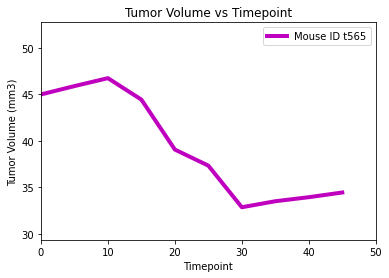

In [16]:
# Select a mouse that was treated with Capomulin and generate a line plot of tumour volume vs. time point for that mouse

# Isolating data for capomulin
capomulin_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]

# I chose mouse "t565", locating her data
capomulin_mouse = capomulin_data.loc[capomulin_data["Mouse ID"] == "t565"]

# Setting up variables to plot from specific columns
timepoints = capomulin_mouse["Timepoint"]
volumes = capomulin_mouse["Tumor Volume (mm3)"]

# Plotting and formatting
plt.plot(timepoints, volumes, color='m', linewidth=4)
label = capomulin_mouse["Mouse ID"].unique()
plt.legend("Mouse ID " + label)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Timepoint")
plt.ylim(volumes.min() - 3.5, volumes.max() + 6)
plt.xlim(0, timepoints.max() + 5)
plt.show()

<AxesSubplot:title={'center':'Mouse weight vs. Average tumor volume for Capomulin'}, xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

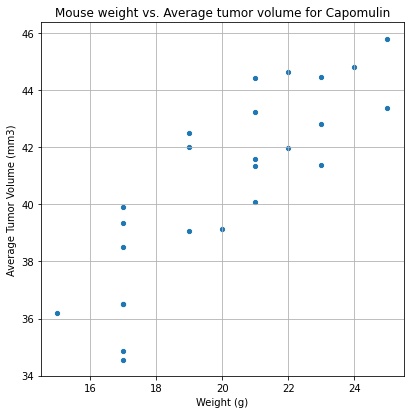

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Use Capomulin regimen data isolated above as capomulin_data

# Locate the relevant columns
spec_capomulin = capomulin_data.loc[ :, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

# Grouping the data by Mouse ID and Weight by Tumor Volume, find the average, set as a dataframe and re-assign index values
avg_capomulin = pd.DataFrame(spec_capomulin.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

# Rename Tumor Volume for x-axis label purposes
avg_capomulin = avg_capomulin.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})

# Plotting and formatting
avg_capomulin.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", title="Mouse weight vs. Average tumor volume for Capomulin", grid= True, figsize= (6.5, 6.5), marker= '8')


In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Store the weight and tumor volume columns using iloc, then calc pearsonr coefficient and print
w = avg_capomulin.iloc[:, 1]
tv = avg_capomulin.iloc[:, 2]
corr_coef = st.pearsonr(w, tv)
print(f"The correlation coefficient between Mouse Weight and Average Tumor Volume for the Capomulin treatment is: {round(st.pearsonr(w,tv)[0],2)}. \nThis is considered a strong correlation.")

The correlation coefficient between Mouse Weight and Average Tumor Volume for the Capomulin treatment is: 0.84. 
This is considered a strong correlation.


Text(0, 0.5, 'Average Tumor Volume (mm3)')

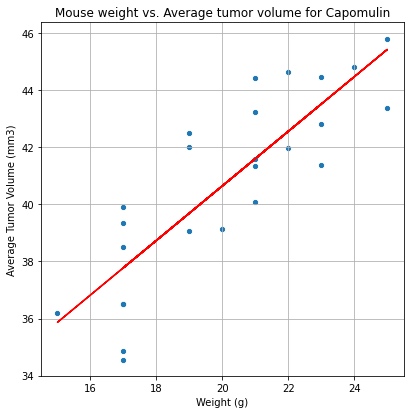

In [19]:
# Calculate linear regression values using weight and tumor volumes defined above
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(w, tv)
vc_fit = vc_slope * w + vc_int

# Plot the linear model on top of scatter plot defined above
avg_capomulin.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", title="Mouse weight vs. Average tumor volume for Capomulin", figsize= (6.5, 6.5), marker= '8', grid= True)
plt.plot(w,vc_fit,"-", color='r')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")